# Làm việc với dữ liệu


*"Học Máy (Machine Learning) là một lĩnh vực nghiên cứu và xây dựng các giải thuật có khả năng học tự động từ dữ liệu để giải quyết các vấn đề cụ thể". Từ đó có thể thấy, dữ liệu (data) đóng một vai trò cực kì quan trọng và là yếu tố đầu tiên cần có khi thực hiện một ứng dụng Machine Learning. *

*Trong bài thực hành ngay hôm nay, chúng ta sẽ cùng tìm hiểu một số khái niệm và kĩ thuật căn bản khi làm việc với các loại dữ liệu.*


### Mục tiểu buổi học
- Tìm hiểu các kiểu dữ liệu cơ bản trong Machine Learning
- Làm việc với dữ liệu bảng, văn bản và hình ảnh trên Python
- Giới thiệu một số phương pháp lưu trữ dữ liệu 

### Nội dung 
1 - Dữ liệu có cấu trúc

2 - Dữ liệu không có cấu trúc
- Dữ liệu văn bản
- Dữ liệu hình ảnh

3 - Lưu trữ dữ liệu


Trong Machine Learning, dữ liệu được chia thành 2 nhóm chính, là **dữ liệu có cấu trúc** (Structured Data) và **dữ liệu không có cấu trúc** (Unstructured Data).
## 1. Dữ liệu có cấu trúc
- Dữ liệu thường biểu diễn ở dạng bảng
- Mỗi hàng biểu diễn một **điểm dữ liệu (instance)**
- Các cột là các **đặc trưng (features) ** và **nhãn (label)** của dữ liệu đó
- Một cách thường dùng để lưu trữ dữ liệu có cấu trúc là lưu trữ ở dạng file **csv** <sup>(1)</sup>

Ví dụ: Iris Dataset
<img src = "img/iris.jpg" width="500px"/>

<sup> 1 </sup> **csv** (comma-separated values) là một định dạng file thông dụng để lưu trữ dữ liệu dạng bảng. Mỗi dòng trong file tương ứng với một hàng, dữ liệu trong một dòng mặc định được phân cách bằng dấu **phẩy**, hoặc các kí tự khác được tự định nghĩa (khoảng cách, tab, etc.)

In [1]:
# Có thể sử dụng thư viện hỗ trợ đọc file csv trong Python
# Hoặc tiến hành đọc file như file text thông thường
import csv   

with open('data/iris.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in list(reader)[::20]:
        print (row)
        

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
['5.1', '3.8', '1.5', '0.3', 'setosa']
['5.1', '3.4', '1.5', '0.2', 'setosa']
['5.2', '2.7', '3.9', '1.4', 'versicolor']
['5.7', '2.6', '3.5', '1.0', 'versicolor']
['5.7', '2.8', '4.1', '1.3', 'versicolor']
['6.0', '2.2', '5.0', '1.5', 'virginica']
['6.9', '3.1', '5.4', '2.1', 'virginica']


Để dễ dàng trong phân tích và xử lý các dữ liệu dạng bảng trên Python, một công cụ thường được sử dụng là **Pandas**

In [2]:
import pandas as pd
df = pd.read_csv('data/iris.csv')
print (df.sample(5))

     sepal_length  sepal_width  petal_length  petal_width     species
18            5.7          3.8           1.7          0.3      setosa
112           6.8          3.0           5.5          2.1   virginica
62            6.0          2.2           4.0          1.0  versicolor
7             5.0          3.4           1.5          0.2      setosa
31            5.4          3.4           1.5          0.4      setosa


Một số kĩ thuật tiền xử lý dữ liệu có cấu trúc: 
- Xử lý dữ liệu bị mất (missing data)
- Chuẩn hóa dữ liệu (normalization) 
- Rời rạc hóa dữ liệu (discretization)
- Phát hiện và xử lý dữ liệu ngoại lai (outlier)


## 2. Dữ liệu không có cấu trúc
Các loại dữ liệu không có cấu trúc thường gặp:
- Dữ liệu văn bản (text)
- Dữ liệu hình ảnh (image)
- Dữ liệu âm thanh (audio)
- Dữ liệu chuỗi thời gian (time series)
- etc.

Đối với các dữ liệu không có cấu trúc, cần có các phương pháp khác nhau để chuyển đổi dữ liệu thô (raw data) thành dạng vector đặc trưng (feature vector) trước khi áp dụng các giải thuật Machine Learning.

### Dữ liệu văn bản
Mục đích của tiền xử lý dữ liệu văn bản là chuyển đổi các từ/kí tự trong văn bản thành các vector thể hiện đặc trưng của văn bản.

Các phương pháp tiền xử lý văn bản thường gặp:

#### a. Tokenization: 
Là quá trình phân tách văn bản thành các từ.

In [3]:
sample_text = "I am writing a sample text."
tokenized_text = sample_text.split()
print (tokenized_text)

['I', 'am', 'writing', 'a', 'sample', 'text.']


In [4]:
# Sử dụng thư viện nltk để hỗ trợ xử lý dữ liệu text
# https://www.nltk.org/

import nltk
tokenized_text = nltk.word_tokenize(sample_text)
print (tokenized_text)

['I', 'am', 'writing', 'a', 'sample', 'text', '.']


#### b. Loại bỏ Stopword: 
Stopword là các từ phổ biến trong ngôn ngữ và không mang ý nghĩa đặc trưng. Đối với các bài toán về phân loại văn bản, các stopword này sẽ được loại bỏ để giảm kích thước tập từ vựng (vocabulary) cũng như hạn chế nhiễu.

In [5]:
from nltk.corpus import stopwords
english_stopword = stopwords.words('english')
print (english_stopword[::5])

['i', 'our', "you've", 'yourself', 'himself', 'herself', 'they', 'what', 'that', 'is', 'been', 'having', 'a', 'if', 'while', 'with', 'through', 'below', 'in', 'under', 'here', 'how', 'few', 'such', 'own', 'very', 'just', 'now', 're', "aren't", 'doesn', "hasn't", 'ma', 'needn', "shouldn't", 'won']


#### c. Stemming
Với một số ngôn ngữ như tiếng anh, từ vựng thường được biến đổi về hình thức do quy tắc về ngữ pháp. Đối với các bài toán chỉ quan tâm đến ngữ nghĩa của từ mà bỏ qua cấu trúc ngữ pháp, người ta thường dùng kỹ thuật stemming để đưa các từ về dạng gốc (cats -> cat, playing -> play).

In [6]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
stemmed_text = [ps.stem(word) for word in tokenized_text]
print (stemmed_text)

['I', 'am', 'write', 'a', 'sampl', 'text', '.']


#### d. Xác định tập từ vựng (vocabulary)
Đối với các bài toán về dữ liệu văn bản, cần xác định một tập từ vựng cố định, là các đặc trưng của văn bản. 

Tập từ vựng thường là tập hợp các từ xuất hiện trong tập dữ liệu huấn luyện, sau khi đã qua các bước như loại bỏ stopword, stemming, etc. Ngoài ra, để giới hạn kích thước tập từ vựng, ta cũng có thể loại bỏ các từ có tần xuất suất hiện quá thấp (các từ hiếm, nhiễu) hay quá phổ biến (các từ không mang nhiều ý nghĩa phân loại) trong toàn tập dữ liệu huấn luyện.

Có thể sử dụng 1 phần từ **< UNK >** (Unknown word) để biểu diễn cho các từ không xuất hiện trong tập từ vựng.


In [7]:
sample_texts = [
    "I am playing with text",
    "It is a cat",
    "I like cat"
]

sample_texts = [nltk.word_tokenize(text) for text in sample_texts]
vocab = set(sum(sample_texts, []))
print (vocab)

{'with', 'It', 'like', 'cat', 'a', 'am', 'is', 'playing', 'I', 'text'}


#### e. Chuyển văn bản về dạng vector đặc trưng

In [26]:
# Chu y can tao them 2 ki hieu dac biet @PADDING@ va @UNKNOW@
word2index = {'@PADDING@': 0, '@UNKNOWN@': 1}
index2word = {0: '@PADDING@', 1: '@UNKNOWN@'}

for i, word in enumerate(vocab):
    # TODO: Tạo mapping cho tập từ vừng: từ -> chỉ số và ngược lại
    #
    # word2index : key   - từ thuộc vocab 
    #               value - chỉ số của từ trong vocab
    #               {'am': 0, 'I': 1, 'with': 2, ... } 
    # index2word : key   - chỉ số của từ trong vocab
    #               value - từ thuộc vocab 
    #               {0: 'am', 1: 'I', 2: 'with', ... }
    #
    word2index[word] = i + 2
    index2word[i + 2] = word

    # END
    
print (word2index)
print (index2word)

{'@PADDING@': 0, '@UNKNOWN@': 1, 'with': 2, 'It': 3, 'like': 4, 'cat': 5, 'a': 6, 'am': 7, 'is': 8, 'playing': 9, 'I': 10, 'text': 11}
{0: '@PADDING@', 1: '@UNKNOWN@', 2: 'with', 3: 'It', 4: 'like', 5: 'cat', 6: 'a', 7: 'am', 8: 'is', 9: 'playing', 10: 'I', 11: 'text'}


In [28]:
def to_index(text, word2index):
    text = nltk.word_tokenize(text)
    index_vector = []
    
    # TODO: Chuyển dữ liệu text về dạng vector chỉ số
    #
    # @param    text          văn bản cần xử lý
    # @param    word2index    mapping word-index
    # @return   index_vector  vector chỉ số của văn bản
    # 
    # Ex: text = "a cat playing with a cat"
    #     word2index = {'am': 0, 'I': 1, 'with': 2, ...} 
    #     index_vector = [9, 7, 6, 2, 9, 7]
    
#     index_vector = [word2index.get(x) for x in text]
    for word in text:
        try:
            index_vector.append(word2index[word])
        except:
            index_vector.append(word2index['@UNKNOWN@'])
    # END
    
    return index_vector

text = "a dog playing with a cat"
print (text)

index_vector = to_index(text, word2index)
print (index_vector)

a dog playing with a cat
[6, 1, 9, 2, 6, 5]


##### One-hot Vector

One-hot vector là vector có tất cả các giá trị bằng 0 và một giá trị duy nhất bằng 1. Vị trí có giá trị bằng 1 chính là giá trị integer mà vector đó biểu diễn. 

One-hot vector thường đường sử dụng để biểu diễn các biến kiểu phân loại (categorical variable) như các nhãn (label) của bài toán phân loại (classification). Trong các bài toán trên dữ liệu văn bản, One-hot vector cũng được sử đụng để biểu diễn các từ, thay cho giá trị index được biểu diễn ở trên.


In [24]:
import numpy as np

def to_onehot(index_vector, vocab):
    
    # Mỗi onehot vector sẽ có độ dài bằng vocab_size
    vocab_size = len(vocab)
    onehot_vectors = None
    
    # TODO: Chuyển giá trị chỉ số về giá trị vector
    # 
    # @param    index_vector    vector chỉ số của văn bản
    # @param    vocab           tập từ vựng
    # @return   onehot_vectors  vector đặc trưng dạng one-hot
    #
    # Ex: index_vector = [9, 7, 6, 2, 9, 7] 
    #     vocab = ['I', 'am', 'write', 'a', 'sampl', 'text', '.']
    #     onehot_vectors = [[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
    #                       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
    #                       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
    #                       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
    #                       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
    #                       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]]
#     onehot_vectors = []
#     for i in index_vector:
#         tmp = [0] * vocab_size
#         tmp[i] = 1
#         onehot_vectors.append(tmp)
    
    onehot_vectors = np.eye(vocab_size, dtype=int)[index_vector]
    
    # END
    
    return onehot_vectors
    
to_onehot(index_vector, vocab)   


array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

##### Mô hình bag-of-word

Đặc điểm mô hình Bag-of-word:
- Coi văn bản là tập hợp của các từ 
- Không quan tâm đến vị trí xuất hiện của từ trong văn bản
- Sử dụng các phương pháp "đếm" <sup>2</sup> để tạo ra các vector đặc trưng cho văn bản

In [11]:
def to_count_vector(index_vector, vocab):
    
    # Mỗi vector đặc trưng sẽ có độ dài bằng vocab_size
    vocab_size = len(vocab)
    count_vector = None
    
    # TODO: Đếm tần suất xuất hiện của các từ 
    #
    # @param   index_vector
    # @param   vocab
    # @return  count_vector     vector đặc trưng là tần suất xuất hiện của các từ trong văn bản
    #
    # Ex:  index_vector = [9, 7, 6, 2, 9, 7]
    #      count_vector = [0. 0. 0. 1. 0. 2. 1. 0. 0. 2.]

    count_vector = [sum(x) for x in zip(*to_onehot(index_vector, vocab))]
    # END
    
    return count_vector
    
print (to_count_vector(index_vector, vocab))

[0, 0, 1, 0, 0, 2, 2, 0, 0, 1]


In [12]:
# Sử dụng CountVectorizer từ thư viện scikit-learn
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

from sklearn.feature_extraction.text import CountVectorizer

sample_texts = [
    "I am playing with text",
    "It is a cat",
    "I like cat"
]

count_vect = CountVectorizer(lowercase=True, stop_words="english")
vectorized_data = count_vect.fit_transform(sample_texts)

print ("vocab:", count_vect.vocabulary_)
print ("count vectorized format:\n",vectorized_data)
print ("array format:\n", vectorized_data.toarray())


vocab: {'playing': 2, 'text': 3, 'cat': 0, 'like': 1}
count vectorized format:
   (0, 3)	1
  (0, 2)	1
  (1, 0)	1
  (2, 1)	1
  (2, 0)	1
array format:
 [[0 0 1 1]
 [1 0 0 0]
 [1 1 0 0]]


<sup>2</sup> Có nhiều phương pháp "đếm" khác nhau được sử dụng để tạo vector đặc trưng cho dữ liệu văn bản. Một phương pháp thường được sử dụng là TF-IDF. 
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

Nhược điểm của mô hình:
- Bỏ qua thông tin về vị trí xuất hiện của từ trong câu
- Không mang thông tin về ngữ nghĩa của các từ trong câu

Hiện nay, với sự phát triển của Deep Learning, những kỹ thuật mới như **Word Embedding**, sử dụng **mạng RNN**, etc., được sử dụng để khắc phục các nhược điểm trên. Các kỹ thuật này sẽ được giới thiệu chi tiết trong các bài giảng tiếp theo của khóa học.

#### Dữ liệu hình ảnh

##### a. Vector đặc trưng của ảnh
- Hình ảnh được lưu trữ trong máy tính dưới dạng ma trận số, các số này thể hiện thông tin về màu sắc của các pixel trong ảnh. 
- Đối với định dạng ảnh RGB: kích thước ma trận gồm chiều dài, chiều rộng và chiều sâu, giá trị mỗi số trong ma trận nằm trong phạm vi [0-255] và thể hiện độ sáng của pixel.


shape = (720, 1280, 3)
[[  1   1   1 ...   0   0   0]
 [191 191 191 ... 185 184 183]
 [189 189 189 ... 183 181 180]
 ...
 [ 93  93  93 ...  84  84  84]
 [ 94  94  94 ...  83  83  83]
 [  4   4   4 ...   5   5   5]]


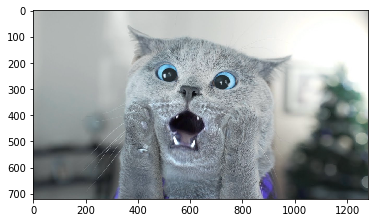

In [13]:
# Ví dụ sử dụng thư viện Open-CV cho xử lý ảnh trong Python
# https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html
import cv2
image = cv2.imread("img/cat.jpg")

print ("shape =", image.shape)
print (image[:, :, 2])


# Sử dụng thư viện Matplotlib để hiển thị ảnh trong Python
# https://matplotlib.org/
%matplotlib inline
from matplotlib import pyplot as plt
plt.subplots()
plt.imshow(image)

##### b. Một số kỹ thuật tiền xử lý ảnh
- Khi làm việc với dữ liệu ảnh trong Machine Learning/Deep Learning, kích thước của ảnh thường là cố định. Cần thay đổi kích thước ảnh đầu vào (resize hoặc crop ảnh)

shape = (15, 15, 3)
[[181 181 182 210 205 203 197 205 211 221 232 240 247 250 233]
 [180 181 182 207 171 203 198 206 212 223 233 247 254 255 254]
 [181 181 183 199 206 137 140 184 213 223 236 251 255 255 255]
 [180 181 182 188 215 151 146 204 161 197 233 246 255 255 255]
 [177 178 181 191 191 139 209 208 159 140 139 207 246 242 255]
 [173 174 178 185 213 173 200 187  56 165 148 209 241 180 255]
 [168 172 173 184 209 192 131 170 185 165 193 205 238  84 192]
 [161 167 168 176 174 218 178 184 161 174 196 195 225  85 169]
 [157 159 151 160 169 164  57 156 125 168 187 194 176  43 139]
 [150 152 134 150 130 161  37  50 120 135 181 197 152  65 129]
 [131 120 112 135 114 114 216 113 162 139 199 174  83  85 117]
 [ 74  88  94  94 114  99 180 155 111 154 144 115  31  36  67]
 [107 104  99  52 110 114 141 154 115 105 153  78  53  67  37]
 [ 67  72  60  46 120 128 131 116 136 131 163  50  28  41  51]
 [ 94 101 101  66 115 129 110 116 127 151 145  52  57  58  61]]


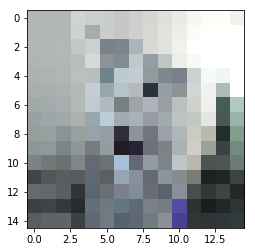

In [14]:
# Thay đổi kích thước ảnh
resized_image = cv2.resize(image, (15, 15)) 
print ("shape =", resized_image.shape)
print (resized_image[:, :, 2])

plt.subplots()
plt.imshow(resized_image)

- Khi không quan tâm đến màu sắc của ảnh, có thể chuyển ảnh thành dạng ảnh xám (greyscale), lúc này, kích thước của ma trận chỉ gồm 2 giá trị là chiều dài và chiều rộng ảnh.

shape = (720, 1280)
[[  2   2   2 ...   1   1   1]
 [192 192 192 ... 188 187 186]
 [190 190 190 ... 186 184 183]
 ...
 [ 92  92  92 ...  80  80  80]
 [ 93  93  93 ...  79  79  79]
 [  3   3   3 ...   1   1   1]]


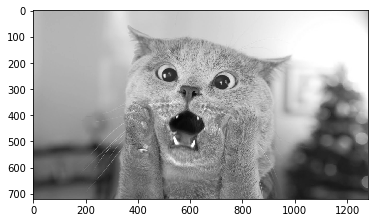

In [15]:
# Chuyển sang ảnh xám
greyscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print ("shape =", greyscale_image.shape)
print (greyscale_image[:, :])

plt.subplots()
plt.imshow(greyscale_image,cmap = 'gray')

- Để làm giàu cho tập dữ liệu (data augmentation), có thể sử dụng một số kỹ thuật như lật ảnh, xoay ảnh, hay dùng cách lớp mặt nạ (mask) để tạo ra các điểm dữ liệu mới.

([], <a list of 0 Text yticklabel objects>)

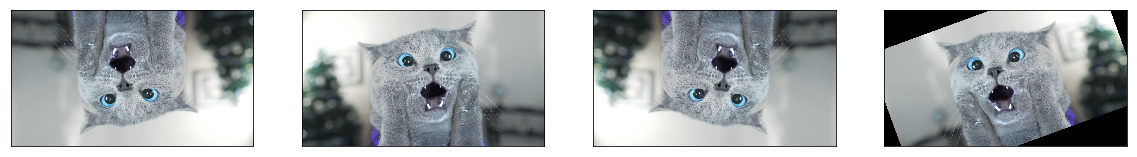

In [16]:
import numpy as np
plt.subplots(figsize=(20, 10))

# Lật ảnh
horizontal_img = cv2.flip(image, 0 )
plt.subplot(141),plt.imshow(horizontal_img)
plt.xticks([])
plt.yticks([])

vertical_img = cv2.flip(image, 1 )
plt.subplot(142),plt.imshow(vertical_img)
plt.xticks([])
plt.yticks([])


both_img = cv2.flip(image, -1 )
plt.subplot(143),plt.imshow(both_img)
plt.xticks([])
plt.yticks([])

# Xoay ảnh
angle = 20
image_center = tuple(np.array(image.shape[1::-1]) / 2)
rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
rot_img = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
plt.subplot(144),plt.imshow(rot_img)
plt.xticks([])
plt.yticks([])

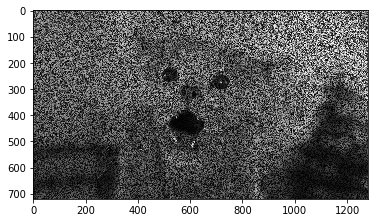

In [17]:
# Với "Mask" là một ma trận cho trước 
# Sử dụng phép nhân hadamard để áp dụng lớp "Mask" lên hình ảnh

mask = np.random.random(greyscale_image.shape[:2])
masked_image = mask * greyscale_image

plt.subplots()
plt.imshow(masked_image,cmap = 'gray')

### 3. Lưu trữ dữ liệu
Trong quá trình huấn luyện mô hình, tiền xử lý dữ liệu là một bước làm tốn nhiều thời gian và bộ nhớ. Vì vậy thông thường, ta sẽ xử lý các dữ liệu thô (raw data), chuyển thành dạng vector đặc trưng và lưu trữ các vector này dưới dạng nhị phân để thuận tiện trong việc lưu trữ và sử dụng.

#### Python Pickle
- Cho phép lưu trữ các cấu trúc dữ liệu trong Python dưới dạng file nhị phân.
- Các thao tác làm việc vói Pickle đơn giản và nhanh chóng

In [18]:
# https://docs.python.org/3/library/pickle.html
import pickle
import numpy as np

data_1 = {
    "apple": 1.5,
    "orange": 5.0,
    "peach": 0
}

data_2 = np.random.random(10)

# Ghi dữ liệu vào file pickle
file_name = "data/pickle_sample.pkl"
pickleFile = open(file_name, 'wb')
pickle.dump(data_1, pickleFile, pickle.HIGHEST_PROTOCOL) # https://docs.python.org/3/library/pickle.html#pickle-protocols
pickle.dump(data_2, pickleFile, pickle.HIGHEST_PROTOCOL)
pickleFile.close()


In [19]:
# Đọc dữ liệu từ file pickle
pickleFile = open(file_name, 'rb')
data_1 = pickle.load(pickleFile)
data_2 = pickle.load(pickleFile)
pickleFile.close()
print (data_1)
print (data_2)

{'apple': 1.5, 'orange': 5.0, 'peach': 0}
[0.81196769 0.66185391 0.45780313 0.10609981 0.14119946 0.4678903
 0.61428196 0.77647716 0.96617192 0.5469089 ]


In [20]:
class Sample():
    def __init__(self):
        self.text = "test data"
    def write_data(self):
        print(self.text)
        
file_name = "data/pickle_class.pkl" 

# Pickle cho phép lưu trữ dữ liệu là class được tự định nghĩa 
sample_class = Sample()
pickleFile = open(file_name, 'wb')
pickle.dump(sample_class, pickleFile, pickle.HIGHEST_PROTOCOL)
pickleFile.close()

pickleFile = open(file_name, 'rb')
sample_class = pickle.load(pickleFile)
pickleFile.close()
sample_class.write_data()

test data


In [21]:
# Class cần được định nghĩa trong chương trình
file_name = "data/pickle_unseen_class.pkl"
pickleFile = open(file_name, 'rb')
unseen_class = pickle.load(pickleFile)
pickleFile.close()
unseen_class.write_data()

AttributeError: Can't get attribute 'UnseenSample' on <module '__main__'>

- Lưu trữ file ở dạng Pickle gặp phải một số hạn chế về kích thước không gian lưu trữ tốc độ truy xuất dữ liệu khi làm việc với dữ liệu lớn 

#### HDF5
- Định dạng HDF5 được sử dụng để lưu trữ dữ liệu lớn dưới dạng file nhị phân
- Dữ liệu được lưu trữ dưới dạng cấu trúc phân cấp (hierarchical structure)
- Dễ dàng lưu trữ và làm việc với dữ liệu số, dữ liệu Numpy


In [ ]:
# https://www.h5py.org/
import h5py

file_name = "data/hdf5_sample.hdf5"
hdf5_file = h5py.File(file_name, "w")

# Tạo dataset rỗng, kiểu integer, kích thước (5,)
dset = hdf5_file.create_dataset("mydataset", (5,), dtype= np.int64)

In [ ]:
# Tạo group
group = hdf5_file.create_group("mygroup")
group_dset = group.create_dataset("group_dset", (5,), dtype=np.float64)

In [ ]:
# Dữ liệu được lưu trữ bằng cấu trúc phân cấp (như thư mục)
print (hdf5_file.name)
print (dset.name)
print (group.name)
print (group_dset.name)

In [ ]:
# Lưu trữ giá trị vào data set
import numpy as np
dset.attrs["data"] = np.random.random((5,5))
dset.attrs["data"]

In [ ]:
dset.attrs["label"] = np.zeros(5)
dset.attrs["label"]

In [ ]:
# Đóng file
hdf5_file.close()

In [ ]:
# Đọc dữ liệu từ hdf5
hdf5_file = h5py.File(file_name, "r")
for name in hdf5_file:
    print (name)
print (hdf5_file["mydataset"])
print (hdf5_file["mygroup"])

In [29]:
# Làm việc với dữ liệu hdf5 tương tự Numpy Array
dataset = hdf5_file["mydataset"]
print (dataset.attrs["data"])
print (dataset.attrs["data"].shape)
print (dataset.attrs["data"].dtype)

NameError: name 'hdf5_file' is not defined

In [ ]:
heteroscecdastic